In [2]:
import warnings
warnings.filterwarnings("ignore")

from torch.optim import Adam
import torch
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split

from utils_data import *
from utils_classification import *
from utils_training import GraphTrainer
from utils_running import GraphRunner
from utils_evaluation import evaluate_graph_metrics
from utils_plot import plot_confusion_matrix, plot_roc

In [3]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available():
    device = "mps"

In [4]:
data = PopulationData().load_raw('data/raw/train.csv')
data.encode_normalized_age()
data.encode_normalized_constitution()
data.encode_normalized_behavior()
# data.encode_standardized_age()
# data.encode_standardized_constitution()
# data.encode_standardized_behavior()
data.encode_connection_int()
data.encode_graph_nx()
data.encode_degree()
# data.encode_degree_centrality()
# data.encode_clustering_coefficient()
data.encode_normalized_degree()
# data.encode_normalized_degree_centrality()
# data.encode_normalized_clustering_coefficient()
# data.encode_standardized_degree()
# data.encode_standardized_degree_centrality()
# data.encode_standardized_clustering_coefficient()
# data.encode_connected_index_patient()
data.encode_distance_to_index_patient()
data.encode_normalized_distance_to_index_patient()
# data.encode_standardized_distance_to_index_patient()
data.encode_sum_neighbor_age()
data.encode_sum_neighbor_constitution()
data.encode_sum_neighbor_behavior()
data.encode_sum_neighbor_degree()
# data.encode_sum_neighbor_degree_centrality()
# data.encode_sum_neighbor_clustering_coefficient()
data.encode_normalized_sum_neighbor_age()
data.encode_normalized_sum_neighbor_constitution()
data.encode_normalized_sum_neighbor_behavior()
data.encode_normalized_sum_neighbor_degree()
# data.encode_normalized_sum_neighbor_degree_centrality()
# data.encode_normalized_sum_neighbor_clustering_coefficient()
# data.encode_standardized_sum_neighbor_age()
# data.encode_standardized_sum_neighbor_constitution()
# data.encode_standardized_sum_neighbor_behavior()
# data.encode_standardized_sum_neighbor_degree()
# data.encode_standardized_sum_neighbor_degree_centrality()
# data.encode_standardized_sum_neighbor_clustering_coefficient()
# data.encode_mean_neighbor_age()
# data.encode_mean_neighbor_constitution()
# data.encode_mean_neighbor_behavior()
# data.encode_mean_neighbor_degree()
# data.encode_mean_neighbor_degree_centrality()
# data.encode_mean_neighbor_clustering_coefficient()
# data.encode_normalized_mean_neighbor_age()
# data.encode_normalized_mean_neighbor_constitution()
# data.encode_normalized_mean_neighbor_behavior()
# data.encode_normalized_mean_neighbor_degree()
# data.encode_normalized_mean_neighbor_degree_centrality()
# data.encode_normalized_mean_neighbor_clustering_coefficient()
# data.encode_standardized_mean_neighbor_age()
# data.encode_standardized_mean_neighbor_constitution()
# data.encode_standardized_mean_neighbor_behavior()
# data.encode_standardized_mean_neighbor_degree()
# data.encode_standardized_mean_neighbor_degree_centrality()
# data.encode_standardized_mean_neighbor_clustering_coefficient()
data.encode_sum_population_age()
data.encode_sum_population_constitution()
data.encode_sum_population_behavior()
# data.encode_sum_population_degree()
# data.encode_sum_population_degree_centrality()
# data.encode_sum_population_clustering_coefficient()
data.encode_normalized_sum_population_age()
data.encode_normalized_sum_population_constitution()
data.encode_normalized_sum_population_behavior()
# data.encode_normalized_sum_population_degree()
# data.encode_normalized_sum_population_degree_centrality()
# data.encode_normalized_sum_population_clustering_coefficient()
# data.encode_standardized_sum_population_age()
# data.encode_standardized_sum_population_constitution()
# data.encode_standardized_sum_population_behavior()
# data.encode_standardized_sum_population_degree()
# data.encode_standardized_sum_population_degree_centrality()
# data.encode_standardized_sum_population_clustering_coefficient()
# data.encode_mean_population_age()
# data.encode_mean_population_constitution()
# data.encode_mean_population_behavior()
# data.encode_mean_population_degree()
# data.encode_mean_population_degree_centrality()
# data.encode_mean_population_clustering_coefficient()
# data.encode_normalized_mean_population_age()
# data.encode_normalized_mean_population_constitution()
# data.encode_normalized_mean_population_behavior()
# data.encode_normalized_mean_population_degree()
# data.encode_normalized_mean_population_degree_centrality()
# data.encode_normalized_mean_population_clustering_coefficient()
# data.encode_standardized_mean_population_age()
# data.encode_standardized_mean_population_constitution()
# data.encode_standardized_mean_population_behavior()
# data.encode_standardized_mean_population_degree()
# data.encode_standardized_mean_population_degree_centrality()
# data.encode_standardized_mean_population_clustering_coefficient()
data.encode_sum_population_distance_to_index_patient()
data.encode_normalized_sum_population_distance_to_index_patient()
# data.encode_standardized_sum_population_distance_to_index_patient()
# data.encode_mean_population_distance_to_index_patient()
# data.encode_normalized_mean_population_distance_to_index_patient()
# data.encode_standardized_mean_population_distance_to_index_patient()
data.encode_test_train()

In [5]:
# print the data
print(data.data_df.head())

       Population  Index_Patient  Infected  Age  Constitution  Behaviour   
ID                                                                         
196194         A0              0         1   49      0.347675          2  \
368647         A0              0         1   80      0.324719          1   
356112         A0              0         1   71      0.583583          1   
176275         A0              0         1   60      0.439978          2   
553189         A0              0         1   49      0.553221          1   

                                              Connections  Normalized_Age   
ID                                                                          
196194  [368647, 356112, 176275, 28922, 402069, 558358...        0.387097  \
368647  [196194, 553189, 1383, 492695, 327671, 489033,...        0.637097   
356112  [196194, 4900, 375956, 206496, 88945, 93987, 7...        0.564516   
176275  [196194, 420398, 550055, 312942, 649285, 4790,...        0.475806   
55318

In [6]:
features = ['Normalized_Age',
			'Normalized_Behaviour',
			'Normalized_Constitution',
			'Normalized_Degree',
			'Normalized_Distance_to_Index_Patient',
			'Normalized_Sum_Neighbor_Age',
			'Normalized_Sum_Neighbor_Behaviour',
			'Normalized_Sum_Neighbor_Constitution',
			'Normalized_Sum_Neighbor_Degree',
			'Normalized_Sum_Population_Age',
			'Normalized_Sum_Population_Behaviour',
			'Normalized_Sum_Population_Constitution',
			'Normalized_Sum_Population_Distance_to_Index_Patient']
graph = data.get_graph_torch(features=features)

In [7]:
print(graph.y.shape)

torch.Size([650000])


In [8]:
# Define model parameters
in_channels = len(features)  # Number of input features
hidden_layers = 32  # Number of hidden units for each layer
out_channels = 1  # Number of output classes (Infected/Not Infected)
num_heads = 4  # Number of attention heads

In [9]:
# Initialize the model
model = GraphAttentionNetwork(in_channels, hidden_layers, out_channels, num_heads).to(device)
criterion = torch.nn.BCELoss()
optimizer = Adam(model.parameters(), lr=0.01)

In [10]:
trainer = GraphTrainer(model, criterion, optimizer)
trainer.train(graph, num_epochs=200, device='cuda')

100%|██████████| 200/200 [00:48<00:00,  4.11it/s]

Best model found with evaluation loss: 0.6838


In [16]:
trainer.test(graph, device='cuda')

Test loss: 0.6832


In [17]:
runner = GraphRunner(model)
test_prob = runner.predict_proba(graph, device=device)
test_pred = runner.predict(graph, device=device)

In [18]:
print("Test Predictions:", test_pred)
print("Test Probabilities:", test_prob)
print("Average Probability:", torch.mean(test_prob))
print("Shape of test_probabilities:", test_prob.shape)
print("Test Labels:", graph.y)

Test Predictions: tensor([1., 1., 1.,  ..., 1., 0., 0.], device='cuda:0')
Test Probabilities: tensor([0.5545, 0.5449, 0.5658,  ..., 0.5317, 0.4989, 0.4570], device='cuda:0')
Average Probability: tensor(0.4716, device='cuda:0')
Shape of test_probabilities: torch.Size([650000])
Test Labels: tensor([1, 1, 1,  ..., 1, 1, 0], device='cuda:0')


In [19]:
accuracy, precision, recall, f1, auc_roc, confusion_matrix = evaluate_graph_metrics(test_pred, test_prob, graph.y, graph.test_mask, device)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')

Accuracy: 0.5627
Precision: 0.5784
Recall: 0.2312
F1: 0.3303
AUC-ROC: 0.5869


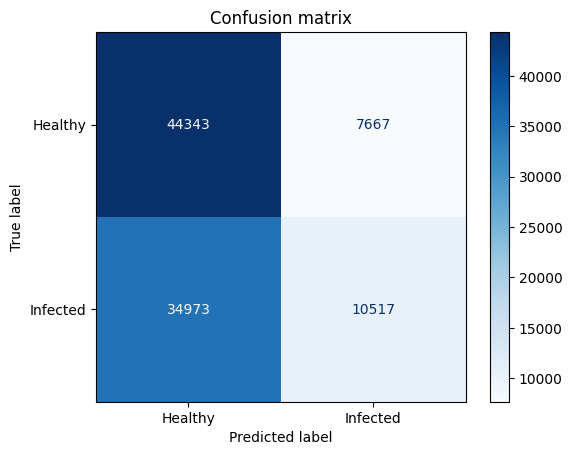

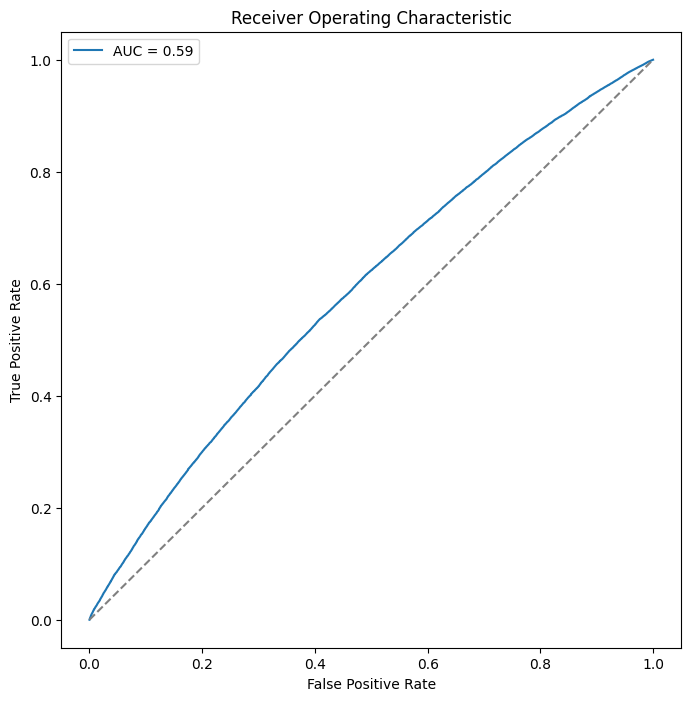

In [20]:
plot_confusion_matrix(confusion_matrix, ['Healthy', 'Infected'])

test_prob_filtered = test_prob[graph.test_mask].cpu().numpy()
test_labels_filtered = graph.y[graph.test_mask].cpu().numpy()

plot_roc(test_prob_filtered, test_labels_filtered)